In [2]:
# Importación de librerías:

# Tratamiento de datos:
import pandas as pd
import numpy as np

import re

# -----------------------------------------------------------------------
# Imputación de nulos usando métodos avanzados estadísticos:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# -----------------------------------------------------------------------
# Visualización:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
print(plt.rcParams['font.family'])

# -----------------------------------------------------------------------
# Evaluar linealidad de las relaciones entre las variables:
import scipy.stats as stats
from scipy.stats import shapiro, kstest
from scipy.stats import skew
# y la distribución de las variables
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# -----------------------------------------------------------------------
# Configuración para poder visualizar todas las columnas de los DataFrames:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# -----------------------------------------------------------------------
# Gestión de los warnings:
import warnings
warnings.filterwarnings("ignore")

['sans-serif']


In [3]:
# Cargamos el primer DataFrame con la información sobre la actividad de vuelo de los clientes.
df_flight_actv = pd.read_csv("Customer Flight Activity.csv")

In [4]:
# Cargamos el segundo DataFrame con la información sobre el perfil detallado de los clientes.
df_loyalty_hist = pd.read_csv("Customer Loyalty History.csv")

### **Fase 1\. <span style="color:#00bf63">Exploración y Limpieza:</span>**
#### **1.1 <span>Exploración Inicial:</span>**

##### **<span style="color:#FFA500">EDA "Customer Flight Activity.csv"</span>**

In [5]:
df_flight_actv.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df_flight_actv.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [7]:
df_flight_actv.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
335755,843672,2017,2,0,0,0,0,0.0,0,0
158016,417118,2017,10,0,0,0,0,0.0,0,0
276820,442103,2018,5,2,2,4,2068,206.0,0,0
287848,128587,2018,6,9,0,9,1044,104.0,0,0
130432,743953,2017,8,0,0,0,0,0.0,0,0
93732,591414,2017,6,0,0,0,0,0.0,0,0
362554,506252,2018,10,0,0,0,0,0.0,0,0
53796,265575,2017,4,12,5,17,2516,251.0,0,0
351505,817245,2018,9,0,0,0,0,0.0,0,0
102447,156457,2017,7,13,0,13,2678,267.0,0,0


In [8]:
print(f"Número de filas: {df_flight_actv.shape[0]}\nNúmero de columnas: {df_flight_actv.shape[1]}")

Número de filas: 405624
Número de columnas: 10


In [9]:
df_flight_actv.info()
# Encontramos que las columnas "Points Redeemed" y "Dollar Cost Points Redeemed" son de tipo int, y deberían ser float.
# "Dollar Cost Points Redeemed" concierne cifras monetarias y no deberíamos excluir losd decimales, y "Points Redeemed" está relacionada con ella.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [10]:
df_flight_actv.columns
# Imprimimos el nombre de todas las columnas.

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [11]:
# Realizamos una exploración de los valores únicos por columna para detectar valores atípicos:

print(f"Valores únicos en Loyalty Number: {df_flight_actv["Loyalty Number"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Year: {df_flight_actv["Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Month: {df_flight_actv["Month"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Flights Booked: {df_flight_actv["Flights Booked"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Flights with Companions: {df_flight_actv["Flights with Companions"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Total Flights: {df_flight_actv["Total Flights"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Distance: {df_flight_actv["Distance"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Points Accumulated: {df_flight_actv["Points Accumulated"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Points Redeemed: {df_flight_actv["Points Redeemed"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Dollar Cost Points Redeemed: {df_flight_actv["Dollar Cost Points Redeemed"].unique()}")

Valores únicos en Loyalty Number: [100018 100102 100140 ... 999731 999788 999891]
--------------------------------------------------------------------------------------------
Valores únicos en Year: [2017 2018]
--------------------------------------------------------------------------------------------
Valores únicos en Month: [ 1  9  2  3 11  4  5  7  6  8 10 12]
--------------------------------------------------------------------------------------------
Valores únicos en Flights Booked: [ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]
--------------------------------------------------------------------------------------------
Valores únicos en Flights with Companions: [ 0  4  7  1  6  3  5  2 10  8  9 11]
--------------------------------------------------------------------------------------------
Valores únicos en Total Flights: [ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]
------------------------------------

In [12]:
# Hacemos un chequeo de los valores de la columna "Points Accumulated", 
# decidimos mantener el tipo de dato en float para no perder los decimales.
df_flight_actv["Points Accumulated"].sample(10)

# Cambiaremos el tipo de dato de la columna "Points Redeemed" de int a float
# para que ambas columnas que contienen datos sobre los puntos sigan el mismo patrón,
# así como, que comparta el mismo tipo de dato que la columna "Dollar Cost Points Redeemed" con la que está relacionada.

240088      0.0
135727    109.0
210297    213.0
354024     73.0
392670    167.0
330886    244.0
154949      0.0
320075    374.0
377850      0.0
24820       0.0
Name: Points Accumulated, dtype: float64

In [13]:
df_flight_actv.duplicated().sum()

1864

In [17]:
# DUPLICADOS:

# Calculamos el número total de filas en la columna Loyalty Number.
numero_filas = df_flight_actv.shape[0]
print(f"Filas en la columna Loyalty Number: {numero_filas }")

# Calculamos el número de valores duplicados en la columna Loyalty Number.
duplicados = df_flight_actv["Loyalty Number"].duplicated().sum()
print(f"Valores duplicados en la columna Loyalty Number: {duplicados}")

# Calculamos el porcentaje de duplicados.
porcentaje_duplicados = (duplicados / numero_filas) * 100
print(f"Porcentaje duplicados en la columna Loyalty Number: {porcentaje_duplicados:.2f}%")

Filas en la columna Loyalty Number: 405624
Valores duplicados en la columna Loyalty Number: 388887
Porcentaje duplicados en la columna Loyalty Number: 95.87%


In [46]:
# Encuentra los valores duplicados en la columna 'Loyalty Number'
dup = df_flight_actv['Loyalty Number'].value_counts()

# Filtra solo los valores que se repiten más de una vez (duplicados)
dup = dup[dup > 1]

# Crea un nuevo DataFrame con los valores duplicados y su frecuencia
df_duplicados = dup.to_frame().reset_index()
df_duplicados.columns = ['Loyalty Number', 'Frecuencia']

df_duplicados

,Loyalty Number,Frecuencia
0,678205,72
1,642020,48
2,130331,48
3,903359,48
4,776466,48
...,...,...
16732,428305,24
16733,428249,24
16734,428162,24
16735,428152,24


In [50]:
df_flight_agrupado = df_flight_actv.groupby(["Loyalty Number", "Year", "Month"]).sum()
df_flight_agrupado

Flights Booked  Flights with Companions  \
Loyalty Number Year Month                                            
100018         2017 1                   3                        0   
                    2                   2                        2   
                    3                  14                        3   
                    4                   4                        0   
                    5                   0                        0   
...                                   ...                      ...   
999986         2018 8                   8                        1   
                    9                   0                        0   
                    10                  6                        0   
                    11                 11                        4   
                    12                  0                        0   

                           Total Flights  Distance  Points Accumulated  \
Loyalty Number Year Month                                                
100018         2017 1                  3      1521               152.0   
                    2                  4      1320               132.0   
                    3                 17      2533               253.0   
                    4                  4       924                92.0   
                    5                  0         0                 0.0   
...                                  ...       ...                 ...   
999986         2018 8                  9      3672               367.0   
                    9                  0         0                 0.0   
                    10                 6       708                70.0   
                    11                15      2040               204.0   
                    12                 0         0                 0.0   

                           Points Redeemed  Dollar Cost Points Redeemed  
Loyalty Number Year Month                                                
100018         2017 1                  0.0                          0.0  
                    2                  0.0                          0.0  
                    3                438.0                         36.0  
                    4                  0.0                          0.0  
                    5                  0.0                          0.0  
...                                    ...                          ...  
999986         2018 8                655.0                         53.0  
                    9                  0.0                          0.0  
                    10                 0.0                          0.0  
                    11                 0.0                          0.0  
                    12                 0.0                          0.0  

[401688 rows x 7 columns]

In [18]:
# NULOS:

df_flight_actv.isnull().sum()
# Comprobamos la cantidad de nulos en el DataFrame.

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [19]:
df_flight_actv.describe().T
# Exploramos los valores estadísticos de todas las columnas, ya que son todas numéricas, transponiendo los axis.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


##### **<span style="color:#FFA500">EDA "Customer Loyalty History.csv"</span>**

In [20]:
df_loyalty_hist.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [21]:
df_loyalty_hist.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [66]:
df_loyalty_hist.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8285,148690,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,70482.0,Married,Nova,8679.84,Standard,2016,11,NaN,NaN
3287,933682,Canada,Alberta,Calgary,T3E 2V9,Female,Doctor,129866.0,Married,Aurora,11833.77,Standard,2018,1,NaN,NaN
12169,581396,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,50800.0,Divorced,Star,3265.16,Standard,2017,4,NaN,NaN
12041,999731,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,82837.0,Married,Star,2951.29,Standard,2013,9,2017.0,12.0
16643,460673,Canada,Ontario,Ottawa,K1F 2R2,Male,Bachelor,69020.0,Married,Star,31706.93,Standard,2017,10,2018.0,6.0
8803,987122,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,81443.0,Married,Nova,10852.96,Standard,2017,4,NaN,NaN
15614,475950,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,53224.0,Married,Star,7980.49,2018 Promotion,2018,2,NaN,NaN
1545,389387,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,51573.0,Single,Aurora,6005.21,Standard,2017,12,NaN,NaN
2706,294278,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,94449.0,Single,Aurora,8661.74,Standard,2013,5,2016.0,6.0
14261,611673,Canada,British Columbia,Vancouver,V6E 3Z3,Male,College,73455.0,Single,Star,6559.35,Standard,2015,1,NaN,NaN


In [23]:
print(f"Número de filas: {df_loyalty_hist.shape[0]}\nNúmero de columnas: {df_loyalty_hist.shape[1]}")

Número de filas: 16737
Número de columnas: 16


In [24]:
df_loyalty_hist.info()
# Encontramos que las columnas "Cancellation Year" y "Cancellation Month",
# cuyos datos representan años y meses, son de tipo float, y deberían ser int.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [25]:
df_loyalty_hist.columns
# Imprimimos el nombre de todas las columnas.

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [26]:
# Realizamos una exploración de los valores únicos por columna para detectar valores atípicos:

print(f"Valores únicos en Loyalty Number: {df_loyalty_hist["Loyalty Number"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Country: {df_loyalty_hist["Country"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Province: {df_loyalty_hist["Province"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en City: {df_loyalty_hist["City"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Postal Code: {df_loyalty_hist["Postal Code"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Gender: {df_loyalty_hist["Gender"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Education: {df_loyalty_hist["Education"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Salary: {df_loyalty_hist["Salary"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Marital Status: {df_loyalty_hist["Marital Status"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Loyalty Card: {df_loyalty_hist["Loyalty Card"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en CLV: {df_loyalty_hist["CLV"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Enrollment Type: {df_loyalty_hist["Enrollment Type"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Enrollment Year: {df_loyalty_hist["Enrollment Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Enrollment Month: {df_loyalty_hist["Enrollment Month"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Cancellation Year: {df_loyalty_hist["Cancellation Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Cancellation Month: {df_loyalty_hist["Cancellation Month"].unique()}")

Valores únicos en Loyalty Number: [480934 549612 429460 ... 776187 906428 652627]
--------------------------------------------------------------------------------------------
Valores únicos en Country: ['Canada']
--------------------------------------------------------------------------------------------
Valores únicos en Province: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
--------------------------------------------------------------------------------------------
Valores únicos en City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
---------------------------------------------------------

In [27]:
df_loyalty_hist.duplicated().sum()
# Comprobamos la cantidad de duplicados en el DataFrame.

0

In [28]:
df_loyalty_hist["Loyalty Number"].duplicated().sum()
# Encontramos que la columna "Loyalty Number", que contiene identificadores únicos y por la que haremos nuestra unión, no contiene duplicados.

0

In [29]:
# NULOS:

df_loyalty_hist.isnull().sum()
# Comprobamos la cantidad de nulos en el DataFrame.

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [30]:
# Imprimimos el número de datos faltantes por columna.
print(f"Nulos en Salary: {df_loyalty_hist["Salary"].isna().sum()}")
print("--------------------------------------------------------------------------------------------")
print(f"Nulos en Cancellation Year: {df_loyalty_hist["Cancellation Year"].isna().sum()}")
print("--------------------------------------------------------------------------------------------")
print(f"Nulos en Cancellation Month: {df_loyalty_hist["Cancellation Month"].isna().sum()}")

# Calculamos el porcentaje de nulos de las columnas donde sea mayor que 0.
porcentajes_nulos = df_loyalty_hist.isnull().mean() * 100
filtro = porcentajes_nulos[porcentajes_nulos > 0]
df_porcentajes = pd.DataFrame({'Porcentaje de nulos': filtro.apply(lambda x: f'{x:.2f}%')})

df_porcentajes

Nulos en Salary: 4238
--------------------------------------------------------------------------------------------
Nulos en Cancellation Year: 14670
--------------------------------------------------------------------------------------------
Nulos en Cancellation Month: 14670


,Porcentaje de nulos
Salary,25.32%
Cancellation Year,87.65%
Cancellation Month,87.65%


In [ ]:
# Observamos que las columnas "Cancellation Year" y "Cancellation Month" contienen un porcentaje muy elevado de nulos.
# Sin embargo, determinamos que no eliminaremos éstas columnas ya que pueden ser significativas para un posterior análisis,
# ya que proporcionan información relevante para describir el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea
# al tratarse del año y el mes en los que cancelaron su membresía.

In [31]:
df_loyalty_hist.describe().T
# Exploramos los valores estadísticos de las columnas numéricas, transponiendo los axis.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [32]:
df_loyalty_hist.describe(include="O")
# Exploramos los valores estadísticos de las columnas categóricas.

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


#### **<span>Limpieza de Datos:</span>**

In [33]:
# OUTLIERS EN "Salary"
# Calculamos el porcentaje de valores negativos en la columna "Salary"
filas = df_flight_actv.shape[0]
valores_negativos = (df_loyalty_hist['Salary'] < 0).sum()

porcentaje_negativos = (valores_negativos / filas) * 100

print("Porcentaje de valores negativos en la columna 'Salary':", porcentaje_negativos, "%")

Porcentaje de valores negativos en la columna 'Salary': 0.0049306747135278 %


In [34]:
# Al devolvernos un porcentaje bajo de outliers (valores negativos en "Salary") optamos por convertirlos a positivos
# haciendo uso de una función lambda para iterar sobre la columna "Salary".
df_loyalty_hist["Salary"] = df_loyalty_hist["Salary"].apply(lambda x: x if x >= 0 else -x)

In [35]:
# Comprobamos los cambios tras aplicar la función de limpieza.
df_loyalty_hist["Salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.])

Asimetría de la columna: 3.35
La distribución no es simétrica. Usar la mediana.


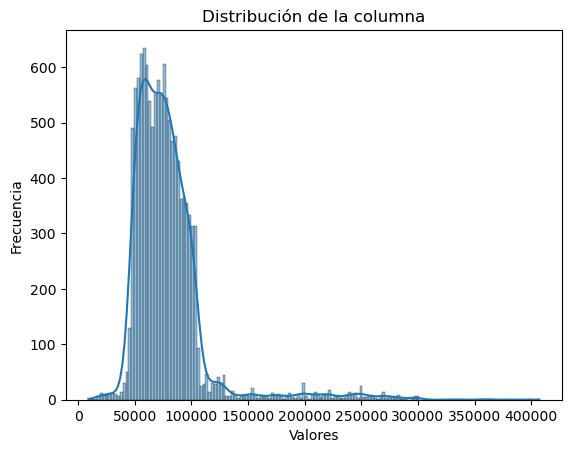

In [36]:
# GESTIÓN DE NULOS:

# Calculamos la asimetría (skewness)
asimetria = skew(df_loyalty_hist["Salary"].dropna())  # Ignora valores nulos

print(f"Asimetría de la columna: {asimetria:.2f}")

# Comprobaciones para saber si usar media o mediana
if -0.5 <= asimetria <= 0.5:
    print("La distribución es aproximadamente simétrica. Usar la media.")
else:
    print("La distribución no es simétrica. Usar la mediana.")

# Grafico la distribución de la columna para una inspección visual
sns.histplot(df_loyalty_hist["Salary"].dropna(), kde = True)
plt.title("Distribución de la columna")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [37]:
# Al comprobar que los datos son asimétricos rellenaremos con la mediana.
mediana = df_loyalty_hist["Salary"].median()
df_loyalty_hist["Salary"].fillna(mediana, inplace=True)

In [38]:
# Comprobamos los cambios tras imputar los nulos con la mediana.
df_loyalty_hist["Salary"].isnull().sum()

0

In [39]:
# Función para cambiar datos de tipo INT ➡️ FLOAT.
# ----------------------------------------------------------------------

# Creamos la variable de las columnas a las que aplicaremos este cambio. 
int_a_float = ["Points Redeemed", "Dollar Cost Points Redeemed"]   
                                                                        
# ----------------------------------------------------------------------

def convertir_int_a_float(df, int_a_float):                                                                                                
    for columna in int_a_float:
        if columna in df.columns and pd.api.types.is_numeric_dtype(df[columna]):
            df[columna] = df[columna].astype(float)
            print(f"Columna {columna} convertida a float")

convertir_int_a_float(df_flight_actv, int_a_float)

Columna Points Redeemed convertida a float
Columna Dollar Cost Points Redeemed convertida a float


In [40]:
# Comprobamos los cambios tras aplicar la función de limpieza.
df_flight_actv[["Points Redeemed", "Dollar Cost Points Redeemed"]].dtypes

Points Redeemed                float64
Dollar Cost Points Redeemed    float64
dtype: object

In [41]:
# Realizamos una segunda comprobación.
print(f"Valores únicos en Points Redeemed corregidos: {df_flight_actv["Points Redeemed"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Dollar Cost Points Redeemed corregidos: {df_flight_actv["Dollar Cost Points Redeemed"].unique()}")

Valores únicos en Points Redeemed corregidos: [  0. 341. 364. 310. 445. 312. 343. 366. 389. 292. 447. 324. 456. 409.
 436. 327. 322. 291. 323. 300. 290. 309. 325. 386. 321. 363. 340. 670.
 443. 517. 444. 328. 344. 367. 313. 333. 293. 449. 297. 455. 372. 356.
 405. 381. 466. 419. 369. 352. 482. 335. 329. 305. 415. 396. 317. 348.
 314. 334. 350. 330. 318. 298. 420. 336. 471. 680. 441. 353. 484. 301.
 374. 417. 501. 299. 398. 307. 368. 306. 347. 439. 395. 481. 337. 382.
 426. 373. 399. 424. 326. 392. 438. 467. 480. 448. 308. 400. 376. 375.
 460. 339. 385. 611. 431. 320. 362. 404. 442. 410. 361. 319. 435. 414.
 464. 477. 315. 485. 370. 421. 349. 371. 416. 496. 510. 667. 465. 434.
 346. 487. 408. 500. 360. 378. 345. 358. 479. 380. 411. 491. 505. 446.
 425. 476. 393. 418. 332. 401. 454. 303. 594. 506. 355. 302. 403. 379.
 437. 561. 483. 597. 391. 562. 342. 407. 490. 468. 488. 457. 365. 357.
 463. 388. 413. 351. 462. 440. 493. 507. 338. 377. 428. 525. 390. 473.
 359. 423. 519. 453. 522. 429. 

In [ ]:
df_loyalty_hist
df_flight_actv

In [72]:
# Función para cambiar datos de tipo FLOAT ➡️ INT.
# ----------------------------------------------------------------------

# Creamos la variable de las columnas a las que aplicaremos este cambio. 
float_a_int = ["Cancellation Year", "Cancellation Month"]

# ----------------------------------------------------------------------

def convertir_float_a_int(df, lista_cols):
    for columna in lista_cols:
        if columna in df.columns and pd.api.types.is_numeric_dtype(df[columna]):

            # Convertimos a int, manteniendo NaN y valores no numéricos como NaN
            df[columna] = df[columna].astype('Int64')

convertir_float_a_int(df_loyalty_hist, float_a_int)

In [73]:
# Comprobamos los cambios tras aplicar la función de limpieza.
df_loyalty_hist[["Cancellation Year", "Cancellation Month"]].dtypes

Cancellation Year     Int64
Cancellation Month    Int64
dtype: object

In [74]:
# Realizamos una segunda comprobación.
print(f"Valores únicos en Cancellation Year corregidos: {df_loyalty_hist["Cancellation Year"].unique()}")
print("--------------------------------------------------------------------------------------------")
print(f"Valores únicos en Cancellation Month corregidos: {df_loyalty_hist["Cancellation Month"].unique()}")

Valores únicos en Cancellation Year corregidos: <IntegerArray>
[<NA>, 2018, 2015, 2017, 2014, 2016, 2013]
Length: 7, dtype: Int64
--------------------------------------------------------------------------------------------
Valores únicos en Cancellation Month corregidos: <IntegerArray>
[<NA>, 1, 12, 4, 2, 7, 11, 5, 6, 10, 8, 9, 3]
Length: 13, dtype: Int64


##### **<span style="color:#FFA500">Unión DataFrames</span>**

In [92]:
df_union = df_loyalty_hist.merge(df_flight_actv, how = "inner", on = "Loyalty Number",
                      left_on = None, right_on = None)

df_union.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,1,0,0,0,0,0.0,0.0,0.0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,2,3,0,3,2823,282.0,0.0,0.0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,3,0,0,0,0,0.0,0.0,0.0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2017,4,0,0,0,0,0.0,0.0,0.0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,<NA>,<NA>,2018,10,6,2,8,3352,335.0,465.0,38.0


In [90]:
print(f"Filas y columnas del df_union: {df_union.shape}")

Filas y columnas del df_union: (405624, 25)


In [88]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       405624 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

In [94]:
# Guardamos el csv unido con todas las columnas, incluidas ["Cancellation Year", "Cancellation Month"] 
df_union.to_csv("info_aerolinea.csv",index=False)

In [98]:
df_union_sin_nulos = df_union[['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
                            'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
                            'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year', 
                            'Month','Flights Booked', 'Flights with Companions', 'Total Flights', 
                            'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']]

In [99]:
# Guardamos el csv unido apartando las columnas ["Cancellation Year", "Cancellation Month"] para que no afecten significativamente al análisis posterior.
df_union_sin_nulos.to_csv("info_aerolinea2.csv",index=False)

In [100]:
df_union_sin_nulos.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Year',
       'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [96]:
df_union.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

### **Fase 2\. <span style="color:#00bf63">Visualización:</span>**

In [95]:
plt.rcParams['font.family'] = ['DejaVu Sans']

In [104]:
df_union_sin_nulos.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                float64
Dollar Cost Points Redeemed    float64
dtype: object

#### **1. <span>¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?</span>**

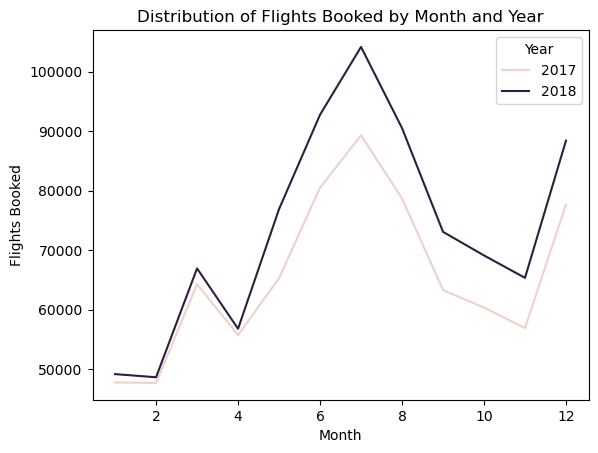

In [106]:
# Hacemos uso de un gráfico de líneas/lineplot para que me muestre la tendencia de los vuelos reservados a lo largo del tiempo.

# Agrupamos los datos por 'Year' anyd 'Month' y calculamos la suma de 'Flights Booked'
df_grouped = df_union_sin_nulos.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

# Creamos el gráfico
sns.lineplot(x = 'Month', y = 'Flights Booked', hue = 'Year', data = df_grouped)

# Añado etiquetas a los ejes para una mejor lectura del gráfico.
plt.xlabel('Month')
plt.ylabel('Flights Booked')
plt.title('Distribution of Flights Booked by Month and Year')

# Muestro el gráfico
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**
Observamos que durante las épocas de vacaciones de Semana Santa, verano y navidades hay un repunte en los vuelos reservados debido al gran movimiento migratorio en estos períodos del año. Siendo verano el más significativo debido a una mayor duración del periodo vacacional, con un repunte en el séptimo mes de julio.

#### **2. <span>¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?</span>**

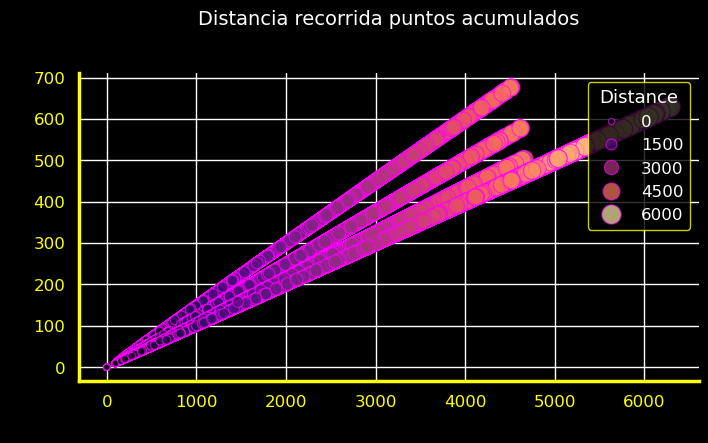

In [135]:
# Establecemos el estilo general de la gráfica
sns.set(style="darkgrid")

# Creamos la figura y los ejes con un tamaño más grande.
fig, ax = plt.subplots(figsize=(8, 4))
fig.patch.set_facecolor('black')  # Cambiar el fondo de toda la figura a negro.

# Creamos el scatterplot con una paleta de colores cálida para destacar los puntos.
scatter = sns.scatterplot(
    x="Distance",
    y="Points Accumulated",
    size="Distance",                    # Tamaño del punto basado en la distancia.
    sizes=(20, 200),                    # Tamaño de los puntos más amplio.
    hue="Distance",                     # Color del punto basado en la distancia.
    palette="magma",                    # Usarla paleta 'magma' para el color.
    alpha=0.7,                          # Hacerlos puntos semitransparentes.
    edgecolor="fuchsia",                # Cambiarel color del borde de los puntos a amarillo
    linewidth=0.8,                      # Espesor del borde de los puntos.
    data=df_union_sin_nulos,
    ax=ax,                              # Especifica el eje.
)
# Ajustamos las etiquetas de los ejes con tamaño 13, negrita y color negro.
ax.set_xlabel("Distance", fontsize=13, color='black', weight='bold')
ax.set_ylabel("Points Accumulated", fontsize=13, color='black', weight='bold')

# Cambiamos el fondo de los ejes para hacerlo negro
ax.set_facecolor('black')  # Fondo del área de la gráfica a negro
ax.spines['top'].set_visible(False)     # Ocultar línea superior
ax.spines['right'].set_visible(False)   # Ocultar línea derecha
ax.spines['left'].set_linewidth(2.5)    # Hacer la línea del eje Y más gruesa
ax.spines['bottom'].set_linewidth(2.5)  # Hacer la línea del eje X más gruesa
ax.spines['left'].set_color('yellow')   # Cambiar el color de la línea del eje Y a amarillo
ax.spines['bottom'].set_color('yellow') # Cambiar el color de la línea del eje X a amarillo

# Cambiamos el color de los números de los ejes a amarillo
ax.tick_params(axis='x', colors='yellow', labelsize=12)  # Cambiar el color y tamaño de los números del eje X a amarillo
ax.tick_params(axis='y', colors='yellow', labelsize=12)  # Cambiar el color y tamaño de los números del eje Y a amarillo


# Personalizamos la leyenda
legend = ax.legend(title='Distance', fontsize=12, title_fontsize='13', loc='upper right', frameon=True, facecolor='black', edgecolor='yellow')
plt.setp(legend.get_texts(), color='white')  # Cambiar el color del texto de la leyenda a blanco
plt.setp(legend.get_title(), color='white')  # Cambiar el color del título de la leyenda a blanco

# Ponemos título a la gráfica
plt.title('Distancia recorrida puntos acumulados', fontsize=14, color='white', pad=35)

# Mostramos la gráfica con fondo negro
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**
Esta gráfica nos muestra que mayor distancia recorrida, más puntos acumulará el cliente, leyéndose como una correlacion fuerte, positiva y ascendente entre ambas variables. Además, visualmente, no se muestran valores atípicos.

#### **3. <span>¿Cuál es la distribución de los clientes por provincia o estado?</span>**

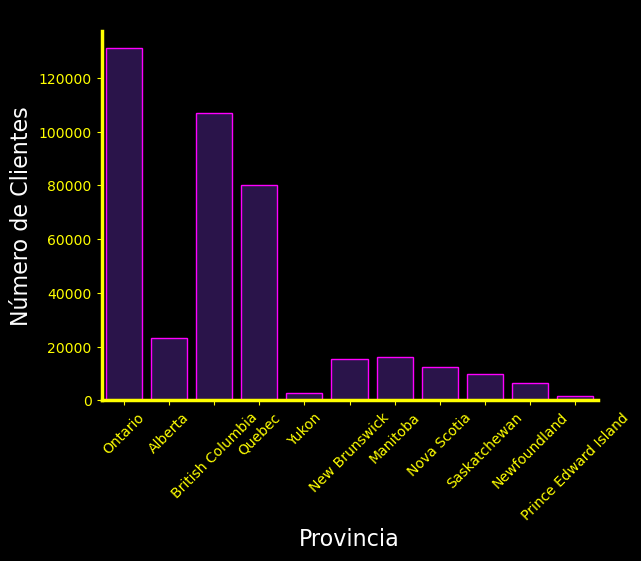

In [134]:
# Usamos la paleta inferno
sns.set_palette("inferno")

# Creamos la figura y el eje, y establecemosw el color de fondo a negro.
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')  # Cambia el color de fondo de la figura a negro.
ax.set_facecolor('black')         # Cambia el color de fondo del área de la gráfica a negro.

# Creamos el countplot
sns.countplot(x = 'Province', data = df_union_sin_nulos, edgecolor='fuchsia', ax=ax)
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Provincia')
plt.xticks(rotation = 45)  # Rota las etiquetas del eje x si son muy largas.

# Ajustamos el color de las etiquetas y personalizamos el tamaño de las fuentes.
ax.set_xlabel('Provincia', fontsize=16, color='white')  # Cambia el color y tamaño de la etiqueta del eje X a blanco.
ax.set_ylabel('Número de Clientes', fontsize=16, color='white')  # Cambia el color y tamaño de la etiqueta del eje Y a blanco.

# Personalizamos los ejes
ax.spines['top'].set_visible(False)     # Oculta línea superior.
ax.spines['right'].set_visible(False)   # Oculta línea derecha.
ax.spines['left'].set_linewidth(2.5)    # Hace la línea del eje Y más gruesa.
ax.spines['bottom'].set_linewidth(2.5)  # Hace la línea del eje X más gruesa.
ax.spines['left'].set_color('yellow')   # Cambia el color de la línea del eje Y.
ax.spines['bottom'].set_color('yellow') # Cambia el color de la línea del eje X.

# Cambiamos el color de los números y nombres de los ejes a amarillo.
ax.tick_params(axis='x', colors='yellow')
ax.tick_params(axis='y', colors='yellow')

plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**
La altura de cada barra representa el número de clientes en esa provincia, facilitando la identificación de las provincias con mayor y menor cantidad de clientes.

#### **4. <span>¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?</span>**

In [ ]:
["Salary"]
["Education"]

##### **<span style="color:#00bf63">Interpretación:</span>**

#### **5. <span>¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?</span>**

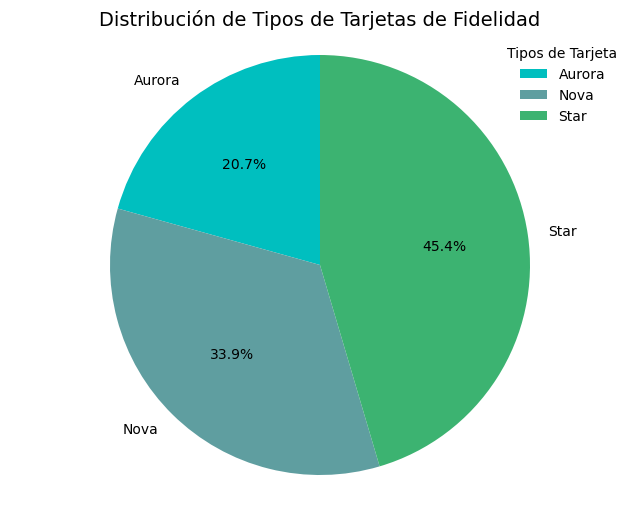

In [132]:
# Agrupamos los datos por tipo de tarjeta y contamos las ocurrencias.
agrupacion = df_union_sin_nulos.groupby('Loyalty Card').size()

# Generamos una lista de colores.
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

# Creamos el gráfico.
plt.figure(figsize=(8, 6))
plt.pie(agrupacion, labels=agrupacion.index, autopct='%1.1f%%', colors=colores, startangle=90)

# Agregamos una leyenda.
plt.legend(title="Tipos de Tarjeta", loc='upper right', frameon=False)

# Ajustamos el aspecto del gráfico.
plt.axis('equal')  # Asegura que el gráfico sea un círculo perfecto
plt.title('Distribución de Tipos de Tarjetas de Fidelidad', fontsize=14)

# Mostramos el gráfico.
plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**
La distribución de los datos indica que el tipo de tarjeta llamada *Star* es la más popular entre los clientes, representando el 45.4% del total. Esta popularidad podría deberse a que ofrece mayores beneficios.
La tarjeta *Nova*  es escogida por los clientes un 33.9%, indicando una diferencia del 11.5% en comparación con *Star*. La tarjeta *Aurora* es, por lo tanto, la menos popular de las tres opciones, representando el 20.7% del total, quizás porque las características de esta tarjeta no sean tan atractivas como las de las otras dos opciones.


#### **6. <span>¿Cómo se distribuyen los clientes según su estado civil y género?</span>**

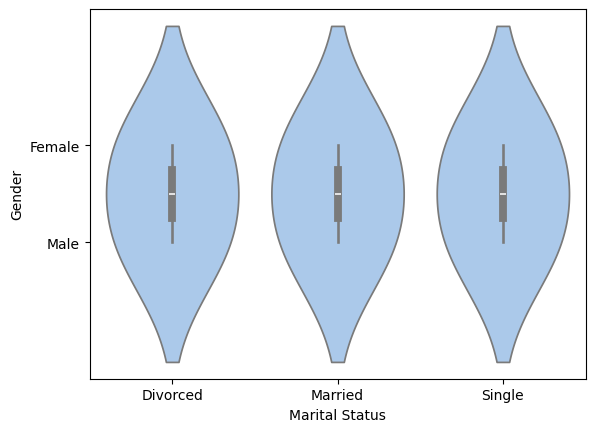

In [127]:
# Agrupamos los datos por EstadoCivil y contamos las ocurrencias de cada género
df_agrupado = df_union_sin_nulos.groupby(['Marital Status', 'Gender']).size().unstack()

# Gráfico de violín
sns.violinplot(x='Marital Status', y='Gender', data=df_agrupado.stack().reset_index())

plt.show()

##### **<span style="color:#00bf63">Interpretación:</span>**

### **Fase 3\. <span style="color:#00bf63">Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo:</span>**

#### **1. <span>Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.</span>**

In [ ]:
["Flights Booked"]
["Education"]

#### **2. <span>Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar, los percentiles…)</span>**

In [ ]:
est_desc_education = df_union.groupby("Education").agg(["mean", "median", "std", "var", "min", "max"])
est_desc_education

##### **<span style="color:#00bf63">Conclusiones:</span>**


#### **3. <span>Prueba Estadística: Realiza una prueba A/B Testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.</span>**